# GMSL Analysis and Prediction 

## Sea Level Rise Dataset (https://datahub.io/core/sea-level-rise)

Ovaj skup podataka sadrži promenu nivoa mora od 1880. do 2013. godine primećenu satelitima.

Podaci koji su od interesa za naš rad su:
* Date - datum merenja 
* GMSL - globalna srednja vrednost nivoa mora

In [2]:
import pandas as pd
import seaborn as sb

In [3]:
df = pd.read_csv('original_datasets/csiro_recons_gmsl_mo.csv', delimiter=',')

In [4]:
df.head()

,Time,GMSL,GMSL uncertainty
0,1880-01-15,-183.0,24.2
1,1880-02-15,-171.1,24.2
2,1880-03-15,-164.3,24.2
3,1880-04-15,-158.2,24.2
4,1880-05-15,-158.7,24.2


In [5]:
df

,Time,GMSL,GMSL uncertainty
0,1880-01-15,-183.0,24.2
1,1880-02-15,-171.1,24.2
2,1880-03-15,-164.3,24.2
3,1880-04-15,-158.2,24.2
4,1880-05-15,-158.7,24.2
...,...,...,...
1603,2013-08-15,71.6,8.8
1604,2013-09-15,68.8,8.8
1605,2013-10-15,66.4,8.9
1606,2013-11-15,59.7,9.0


In [348]:
df.columns

Index(['Time', 'GMSL', 'GMSL uncertainty'], dtype='object')

#### Uklanjanje kolone koja nije od interesa

In [349]:
df.drop('GMSL uncertainty', axis = 1, inplace = True)

In [350]:
df.rename(columns={'Time':'Date'}, inplace = True)

In [351]:
df.head()

,Date,GMSL
0,1880-01-15,-183.0
1,1880-02-15,-171.1
2,1880-03-15,-164.3
3,1880-04-15,-158.2
4,1880-05-15,-158.7


In [352]:
df.describe()

,GMSL
count,1608.000000
mean,-66.079540
std,62.893171
min,-184.500000
25%,-117.100000
50%,-74.000000
75%,-15.375000
max,82.400000


In [353]:
df.isna().sum()

Date    0
GMSL    0
dtype: int64

#### Nema nedostajućih vrednosti

<AxesSubplot:xlabel='GMSL'>

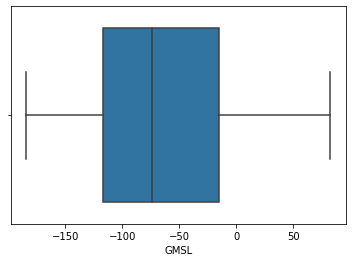

In [354]:
sb.boxplot(x=df['GMSL'])

#### Sa grafika se može videti da ne postoje Autlajeri

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1608 non-null   object 
 1   GMSL    1608 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.2+ KB


In [356]:
df['Date'] = pd.to_datetime(df['Date'])

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1608 non-null   datetime64[ns]
 1   GMSL    1608 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 25.2 KB


#### Pomoću metode nunique proverićemo da li imamo duplikate za kolonu datum.

In [358]:
df.shape

(1608, 2)

In [359]:
df.nunique()

Date    1608
GMSL    1129
dtype: int64

#### Pošto skup podataka ima 1608 redova, a rezultat nunique vraća da postoji 1608 različitih Date zaključujemo da ne postoje duplikati.

In [360]:
df['Date'] = df['Date'].dt.strftime('%Y-%m')

In [361]:
df.head()

,Date,GMSL
0,1880-01,-183.0
1,1880-02,-171.1
2,1880-03,-164.3
3,1880-04,-158.2
4,1880-05,-158.7


#### Uzimamo u obzir datume od 1969. do 2013. godine

In [362]:
df = df[(df['Date'] >= '1969-01') & (df['Date'] <= '2013-12')]

In [363]:
df.reset_index(inplace = True)

In [364]:
df.drop('index', axis = 1, inplace = True)

In [365]:
#df.set_index('Date', inplace = True)

In [366]:
# idx = pd.date_range(start='2014-01', end='2015-12' , freq='M')
# df_missing = df.reindex(idx, fill_value=None)

# df = df.append(df_missing).reset_index()

In [367]:
#df.rename(columns={'index':'Date'}, inplace = True)

In [368]:
#df['Date'] = pd.to_datetime(df['Date'])

In [369]:
#df['Date'] = df['Date'].dt.strftime('%Y-%m')

In [370]:
#df.tail(30)

In [371]:
df.head().append(df.tail())

,Date,GMSL
0,1969-01,-35.8
1,1969-02,-37.2
2,1969-03,-36.2
3,1969-04,-37.4
4,1969-05,-38.6
535,2013-08,71.6
536,2013-09,68.8
537,2013-10,66.4
538,2013-11,59.7
539,2013-12,58.5


In [372]:
df.to_csv('processed_datasets/GMSL.csv', index = False)